In [1]:
import pdb
import sys
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from pseudospectrumwrapper import PseudoSpectrumWrapper
from pseudospectrum import PseudoSpectrum
from pseudospectrumplots import PseudoSpectrumPlots
from toolbox import Toolbox

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
iterations = 1

In [3]:
# Define Path to configuration file
path_ini_file = os.path.join(".","config","sptXspt.ini")

In [4]:
# Use PseudoSpectrum to read in config file
mask='hanning'
#mask='kaiser'
pseudospectrum_object = PseudoSpectrumWrapper(path_ini_file,
                                              read_maps=True,
                                              save_automatically=True,
                                              overwrite_results=True,
                                              mask=mask,
                                              #mask={mask: 6},
                                             )
pseudospectrum_object = PseudoSpectrumPlots(pseudospectrum_object)
pseudospectrum_object.copy_config_file(path_ini_file, overwrite_results=True)

spt_psw
17.6
spt_pmw
24.4
spt_plw
35.7


In [5]:
pseudospectrum_object.maps_dict.keys()

dict_keys(['spt_psw', 'spt_pmw', 'spt_plw'])

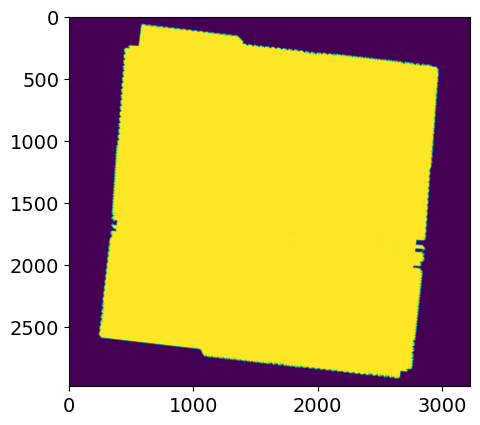

In [6]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks']['mask']);

In [7]:
pseudospectrum_object.maps_dict['spt_plw']['masks'].keys()

dict_keys(['mask', 'hanning'])

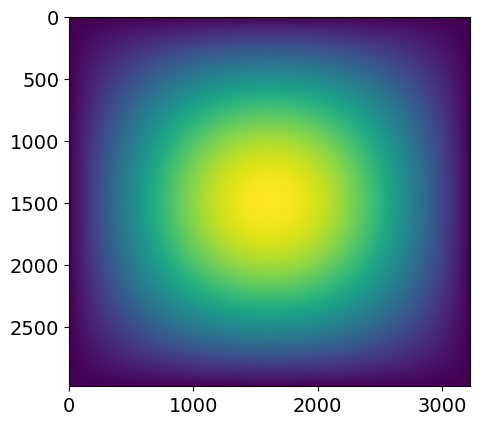

In [8]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks'][mask]);

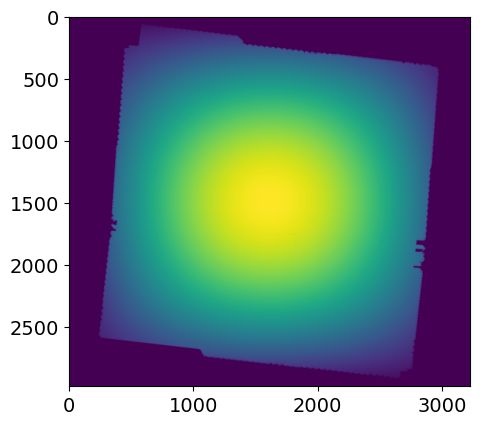

In [9]:
plt.imshow(pseudospectrum_object.maps_dict['spt_plw']['masks']['mask']*
           pseudospectrum_object.maps_dict['spt_plw']['masks'][mask]);

In [10]:
# Create MKK
mkk_dict = pseudospectrum_object.get_mkks(iterations=iterations, cross_spectra=True, overwrite=False)

0 0
0 1
0 2
1 1
1 2
2 2


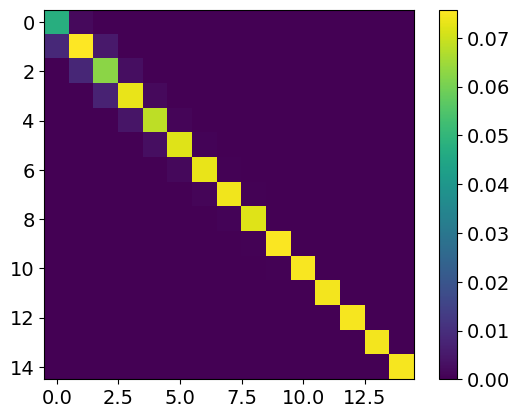

In [11]:
plt.imshow(mkk_dict['spt_plwxspt_plwx{0:0.0f}'.format(iterations)]);
plt.colorbar();

In [12]:
maps_dict = pseudospectrum_object.maps_dict

In [13]:
mkk_dict.keys()

dict_keys(['spt_pswxspt_pswx1', 'spt_pswxspt_pmwx1', 'spt_pswxspt_plwx1', 'spt_pmwxspt_pmwx1', 'spt_pmwxspt_plwx1', 'spt_plwxspt_plwx1'])

In [14]:
pk_dict = pseudospectrum_object.get_pseudospectra(mkk_dict, maps_dict=maps_dict, cross_spectra=True, iterations=1, overwrite=True)

True
0 0
spt_pswXspt_pswX1
Calculating spt_pswXspt_psw fft
Calculating spt_pswXspt_pswX1 pk
False
0 1
spt_pswXspt_pmwX1
Calculating spt_pswXspt_pmw fft
Calculating spt_pswXspt_pmwX1 pk
False
0 2
spt_pswXspt_plwX1
Calculating spt_pswXspt_plw fft
Calculating spt_pswXspt_plwX1 pk
True
1 1
spt_pmwXspt_pmwX1
Calculating spt_pmwXspt_pmw fft
Calculating spt_pmwXspt_pmwX1 pk
False
1 2
spt_pmwXspt_plwX1
Calculating spt_pmwXspt_plw fft
Calculating spt_pmwXspt_plwX1 pk
True
2 2
spt_plwXspt_plwX1
Calculating spt_plwXspt_plw fft
Calculating spt_plwXspt_plwX1 pk


In [15]:
pk_dict.keys()

dict_keys(['spt_pswxspt_psw', 'spt_pswxspt_pmw', 'spt_pswxspt_plw', 'spt_pmwxspt_pmw', 'spt_pmwxspt_plw', 'spt_plwxspt_plw'])

3315502


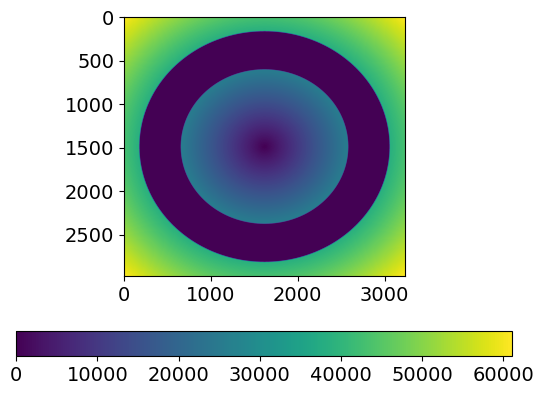

In [16]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
dims=np.shape(kmap)
plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.colorbar(orientation="horizontal");

3315502


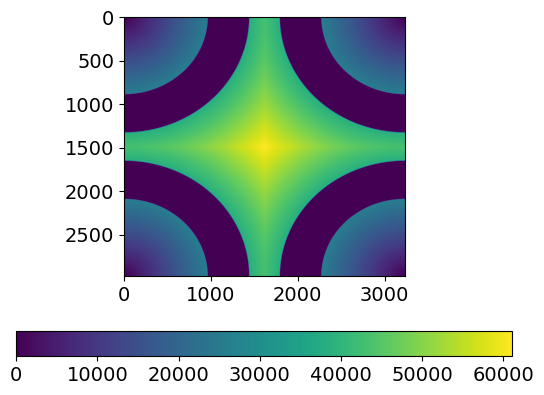

In [17]:
kmap=pseudospectrum_object.maps_dict['spt_psw']['kmap'].copy()
ell=pk_dict['spt_pswxspt_psw']['ell']
ind_ell = (kmap >= ell[13]) & (kmap < ell[14])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
#dims=np.shape(kmap)
#plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.imshow(kmap)
plt.colorbar(orientation="horizontal");

In [18]:
path_sav = os.path.join(os.environ['MAPSPATH'],'Herschel','bandpowers','combined_spectra_all_corrected_errors')
file_sav = 'combined_spectra_extended_sources_only_dl_160_bin_width_25_percent_'

def plot_pseudospectra(self, pk_dict):
    pk_keys = pk_dict.keys()
    x_left = np.unique([i.split('x')[0] for i in pk_dict.keys()]).tolist()[::-1]
    x_right = np.unique([i.split('x')[1] for i in pk_dict.keys()]).tolist()[::-1]
    
    fig, axs = plt.subplots(len(x_left), len(x_right), figsize=(22, 10))
    for i, key in enumerate(pk_keys):
        #print(key)
        wv_split = key.split('x')
        
        xcorr_label = '{0:0.0f}x{1:0.0f}'.format(pk_dict[key]['wv1'], pk_dict[key]['wv2'])
        
        ii = x_left.index(wv_split[0])
        iii = x_right.index(wv_split[1])

        #sav_label = 'x'.join([wv_split[0], wv_split[1]])
        path_v12 = os.path.join(path_sav, file_sav + xcorr_label + '.sav')
        ell = pk_dict[key]['ell']
        k_theta = self.ell_to_k(ell)

        if (wv_split[0] == wv_split[1]) & (ii == iii) | (wv_split[0] != wv_split[1]) & (ii < iii):
            #Bl = ell = pk_dict[key]['psf']

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:, 0, 0]
                axs[ii, iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))

            pk = pk_dict[key]['pk_raw']
            pk_corrected_psf = pk_dict[key]['pk_beam_corrected']

            plot_mkk = False
            if 'pk_mkk_corrected' in pk_dict[key]:
                pk_corrected_mkk = pk_dict[key]['pk_mkk_corrected']
                pk_corrected_both = pk_dict[key]['pk_mkk_and_beam_corrected']
                plot_mkk = True

            axs[ii, iii].plot(k_theta, pk, '-o', c='g', label='spt raw')
            if plot_mkk:
                axs[ii, iii].plot(k_theta, pk_corrected_mkk, '-o', c='b', label='spt mkk corr')
                axs[ii, iii].plot(k_theta, pk_corrected_both, '-o', c='r', label='spt beam corr')

            axs[ii, iii].set_xlim([0.005, 2.05])
            axs[ii, iii].set_xscale('log')
            axs[ii, iii].set_yscale('log')
            axs[ii, iii].set_title(key)

            axs[ii, iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii, iii].set_xticklabels([])
            else:
                axs[ii, iii].set_xlabel('k_theta (arcmin^-1)')

            if not ii and not iii:
                axs[ii, iii].legend(loc='lower left');
        else:
            axs[ii, iii].axis('off')
            
    axs[1, 0].axis('off')
    axs[2, 0].axis('off')
    axs[2, 1].axis('off')

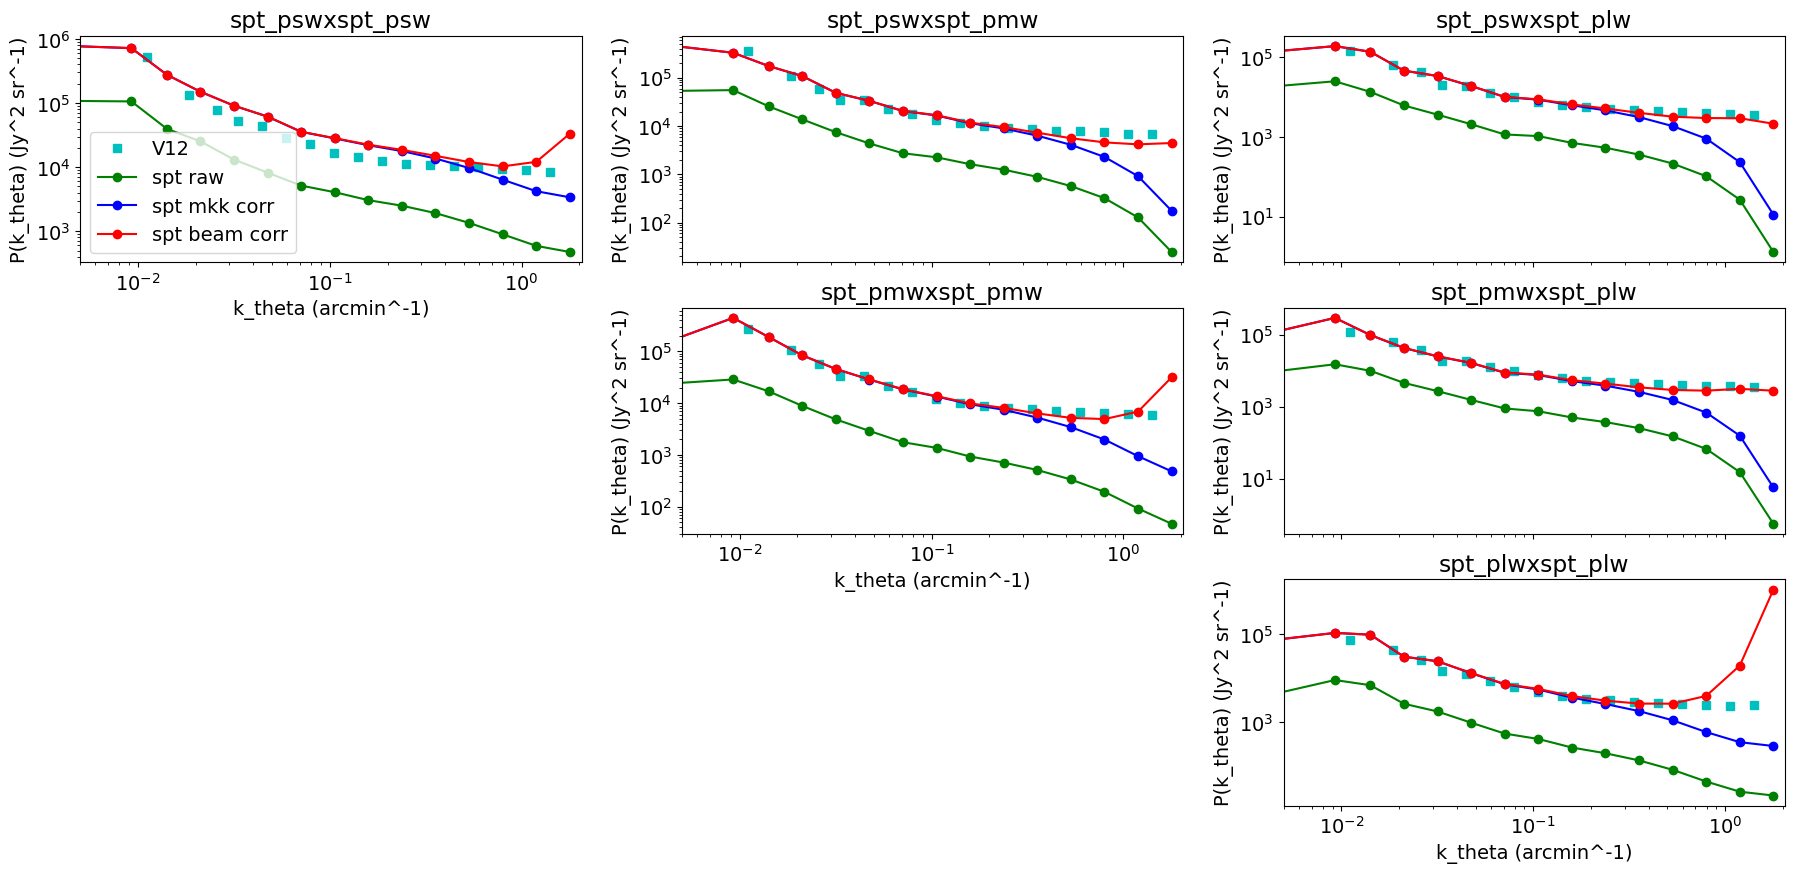

In [20]:
pseudospectrum_object.plot_crossspectra(pk_dict)

In [19]:
Bl=pk_dict['spt_pswxspt_psw']['Bl']
ell_bins=pk_dict['spt_pswxspt_psw']['ell_bins']

In [47]:
def get_weighted_ell(ell_lo, deltal, sigma_radian1):
    sigma_ell1 = 1 / sigma_radian1
    ell = np.arange(ell_lo, ell_lo+deltal)
    iBl = np.sum((2*ell+1)*(np.exp(-0.5 * (ell / sigma_ell1) ** 2)))/np.sum((2*ell+1))
    #pdb.set_trace()
    return iBl

In [48]:
sigma_radian1 = (24 / 3600 * np.pi / 180) / np.sqrt(8 * np.log10(2))

In [55]:
get_weighted_ell(9395.93510721, 4662.59802255, sigma_radian1)

0.6717292806839166

In [58]:
[get_weighted_ell(ell_bins[i], d, sigma_radian1) for i, d in enumerate(np.diff(ell_bins))]

[0.9999651692341195,
 0.9998811190349334,
 0.9997154525027588,
 0.9993640541934082,
 0.998576601183751,
 0.9968147173810299,
 0.9928838644734832,
 0.9841366340936992,
 0.9648580587595784,
 0.9231038758848084,
 0.8363457719755633,
 0.6717292806838681,
 0.4147975690308623,
 0.14704775057290032,
 0.0173409332696303]

In [52]:
np.diff(ell_bins)

array([  100.        ,   100.        ,   124.05891402,   185.62137062,
         277.73331325,   415.55448617,   621.76743926,   930.31061242,
        1391.96390955,  2082.70603347,  3116.21902844,  4662.59802255,
        6976.34541137, 10438.25675372, 15618.09194239])

In [61]:
def get_psf_correction(ell_bins, fwhm_arcsec, fwhm_arcsec2=None):
    sigma_radian1 = (fwhm_arcsec / 3600 * np.pi / 180) / np.sqrt(8 * np.log10(2))
    sigma_ell1 = 1 / sigma_radian1
    Bl10= np.exp(-0.5 * (ell / sigma_ell1) ** 2)
    Bl1 = np.array([get_weighted_ell(ell_bins[i], d, sigma_radian1)
                    for i, d in enumerate(np.diff(ell_bins))])
    
    if fwhm_arcsec2:
        sigma_radian2 = (fwhm_arcsec2 / 3600 * np.pi / 180) / np.sqrt(8 * np.log10(2))
        sigma_ell2 = 1 / sigma_radian2
        Bl20= np.exp(-0.5 * (ell / sigma_ell2) ** 2)
        Bl2 = np.array([get_weighted_ell(ell_bins[i], d, sigma_radian2)
                        for i, d in enumerate(np.diff(ell_bins))])
        Bl0= np.sqrt(Bl10* Bl20)
        Bl = np.sqrt(Bl1 * Bl2)
        return Bl #, Bl0
    else:
        return Bl1 #, Bl10

In [62]:
ell_lo = 200
deltal= 500
np.linspace(ell_lo,500)
newBl, oldBl = get_psf_correction(ell_bins, 30)

In [63]:
newBl

array([0.99994558, 0.99981426, 0.99955543, 0.99900652, 0.99777687,
       0.99502767, 0.9889044 , 0.97532969, 0.94566223, 0.88259985,
       0.75688112, 0.53887517, 0.25719157, 0.05414314, 0.00238298])

In [64]:
oldBl

array([0.99995608, 0.99982434, 0.99958937, 0.99908094, 0.99794366,
       0.99540228, 0.98973629, 0.97716837, 0.94960783, 0.89069276,
       0.77171127, 0.55981274, 0.27285884, 0.05460376, 0.00148934])